##  PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
# !pip install keras

In [2]:
#!pip install scikeras

In [3]:
# !pip install tensorflow==2.14.0

In [4]:
#!pip install keras-tuner


##  1.Import Libraries

In [5]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions

from collections import Counter
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch
from scikeras.wrappers import KerasClassifier

import warnings
warnings.filterwarnings('ignore')

##  2. Import Dataset

In [6]:
forest_fire = pd.read_csv('forestfires.csv')
pd.set_option('display.max_columns', 31)
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,small


In [7]:
fire_data = forest_fire.drop(forest_fire.columns[[11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]], axis=1)
fire_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


##  3. Data Exploration

In [8]:
fire_data.shape

(517, 12)

In [9]:
fire_data.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [10]:
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


##  3.1 Missing Values

In [11]:
fire_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

## 3.2 Duplicated Values

In [12]:
fire_data[fire_data.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,small


## 3.3 Types of variables

In [13]:
# List of Numerical Variables
numerical_features = [feature for feature in fire_data.columns if fire_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))

# Visualize the numerical variables
fire_data[numerical_features].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0



* Numerical variables are usually of 2 types

* Continuous variable and discrete variable

In [14]:
#discrete feature

discrete_feature = [feature for feature in numerical_features if len(fire_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 2


In [15]:
#continuous feature

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


In [16]:
#Categorical Variables

categorical = [var for var in fire_data.columns if fire_data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['month', 'day', 'size_category']


In [17]:
#Frequency counts of categorical variables

for var in categorical: 
    
    print(fire_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


## Number of labels: Cardinality

Number of labels: Cardinality
The number of labels within a categorical variable is known as cardinality.
A high number of labels within a variable is known as high cardinality. 
High cardinality may pose some serious problems in the machine learning model. 
So, I will check for high cardinality.

In [18]:
for var in categorical:
    
    print(var, ' contains ', len(fire_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


In [19]:
#correlation

fire_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


## 4. Data Visualization

### 4.1 Univariate plots

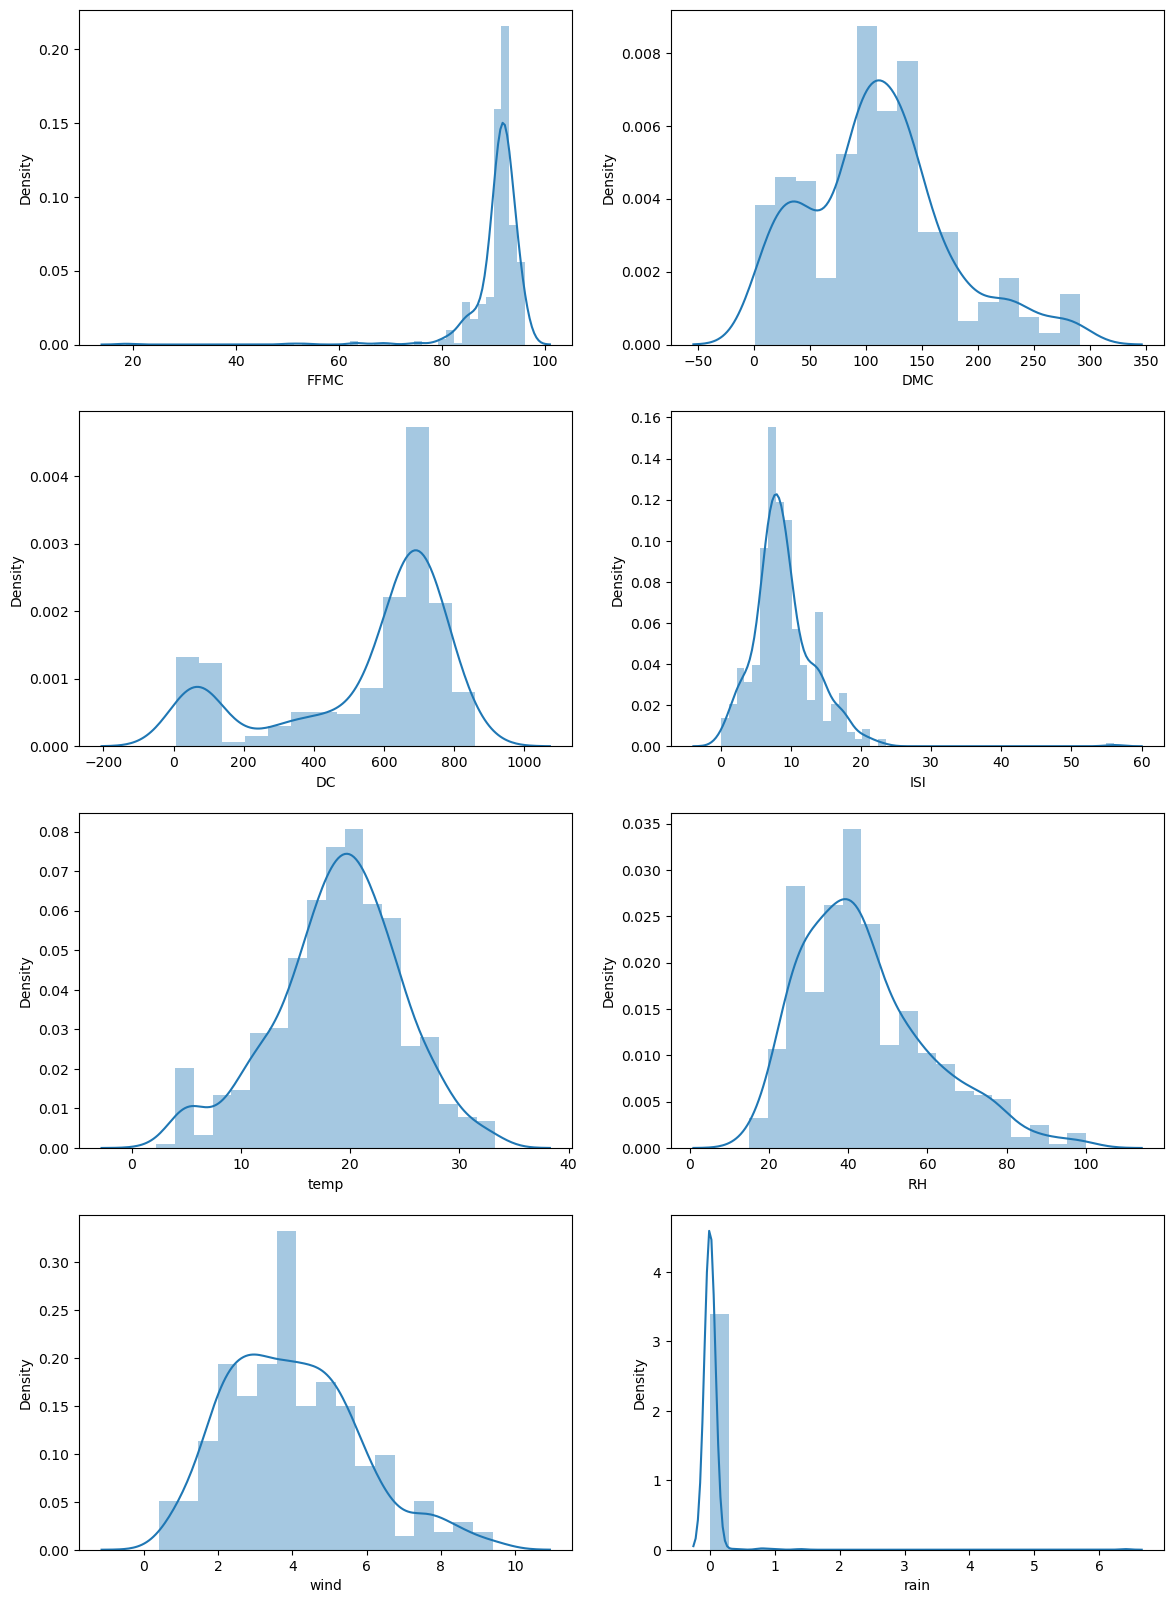

In [20]:
fig, ax = plt.subplots(4,2, figsize = (14,20))

sns.distplot(fire_data.FFMC, ax = ax[0,0])
sns.distplot(fire_data.DMC, ax = ax[0,1])
sns.distplot(fire_data.DC, ax = ax[1,0])
sns.distplot(fire_data.ISI, ax = ax[1,1])
sns.distplot(fire_data.temp, ax = ax[2,0])
sns.distplot(fire_data.RH, ax = ax[2,1])
sns.distplot(fire_data.wind, ax = ax[3,0])
sns.distplot(fire_data.rain, ax = ax[3,1])

plt.show()

## 4.2 Outliers Detection

In [21]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)    # 1st quartile (25%)
        Q3 = np.percentile(df[col],75)    # 3rd quartile (75%)
        IQR = Q3 - Q1                     # Interquartile rrange (IQR)
        
        outlier_step = 1.5 * IQR          # outlier step
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(forest_fire[continuous_feature]))))


The dataset contains 3 observations with more than 2 outliers


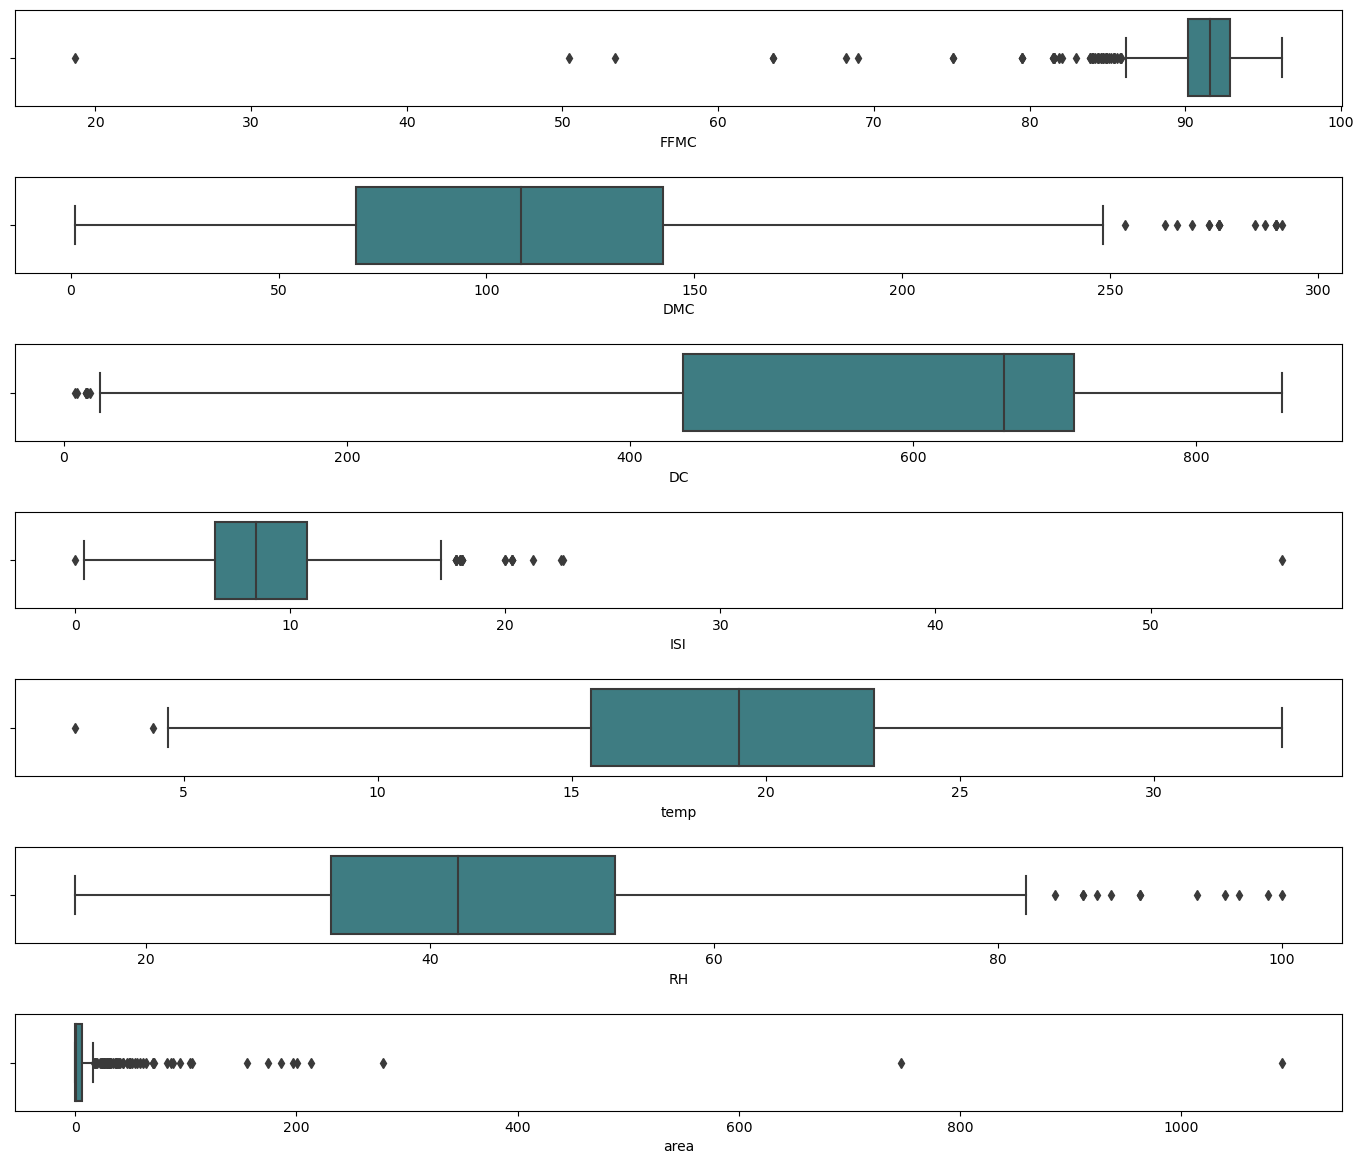

In [22]:
outlier = fire_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

Observation
There are lot of outliers present in the dataframe 
but we can't drop them because they are present in a very large quantity 
and can be important for model building

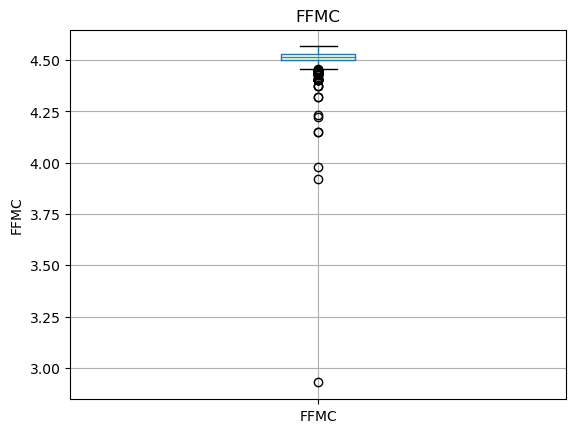

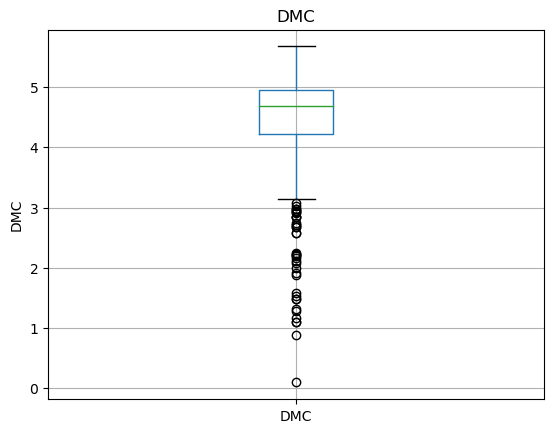

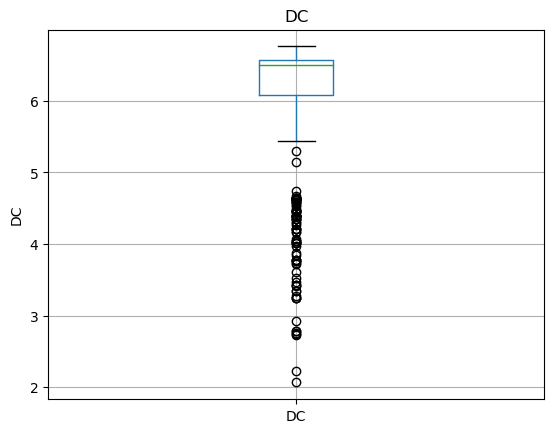

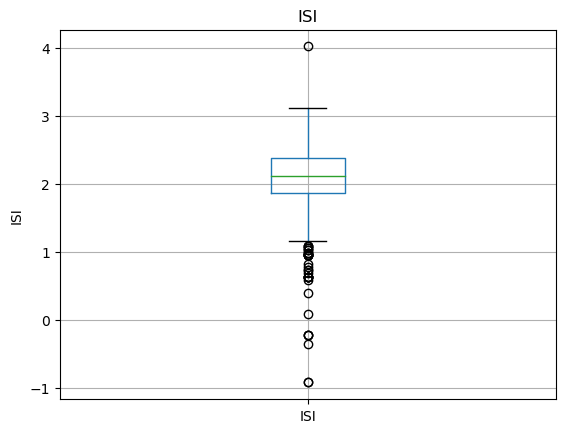

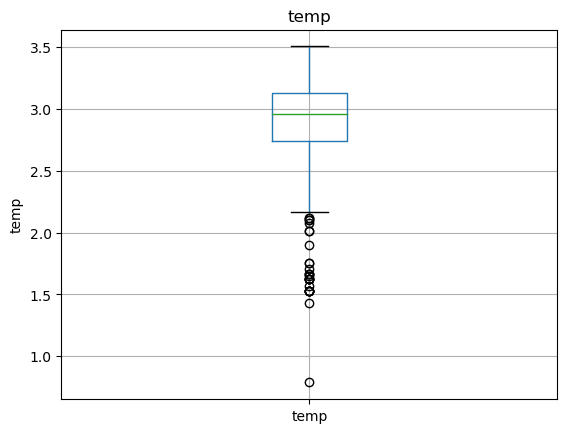

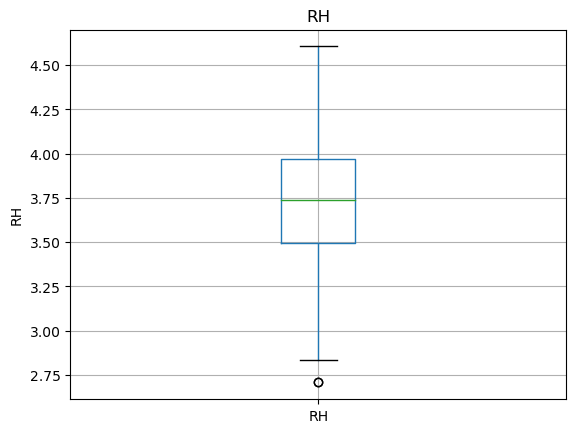

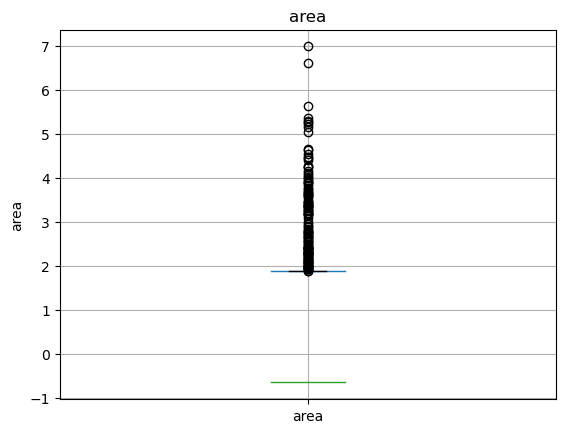

In [23]:
#After Log-Transformation

for feature in continuous_feature:
    data = fire_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## 4.3 Visualize the distribution of 'Area' and taking insights

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


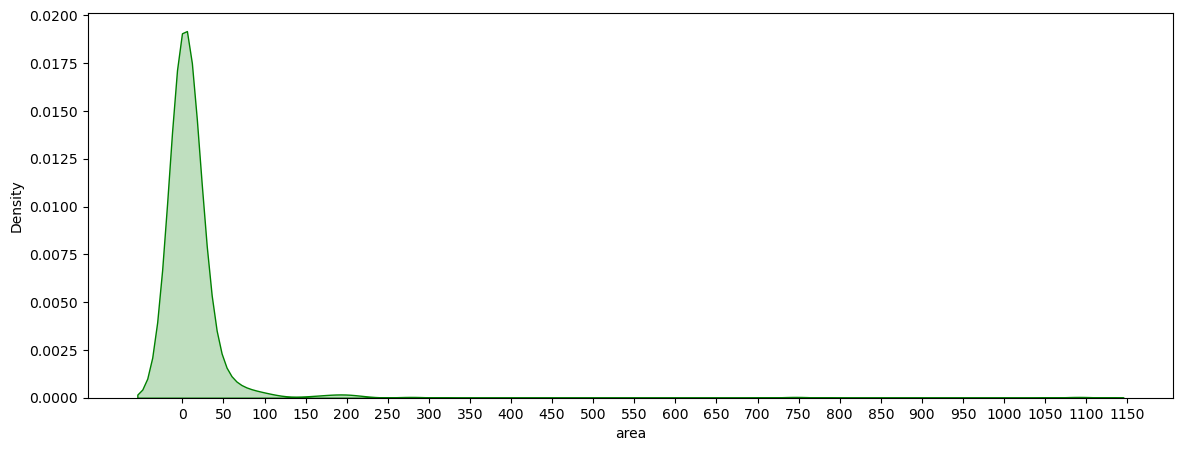

In [24]:
plt.figure(figsize=(14,5))
print("Skew: {}".format(fire_data['area'].skew()))
print("Kurtosis: {}".format(fire_data['area'].kurtosis()))
ax = sns.kdeplot(fire_data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

## 4.4 Categorical Variables

In [25]:
categorical_features=[feature for feature in fire_data.columns if fire_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
forest_fire[categorical_features].head()


Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


In [26]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(fire_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


### Decide which categorical variables you want to use in model

In [27]:
for feature in fire_data.columns:
    if fire_data[feature].dtypes == 'object':      # in pandas it is object
        unique_cat = len(fire_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(fire_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



## Analyzing categorical columns

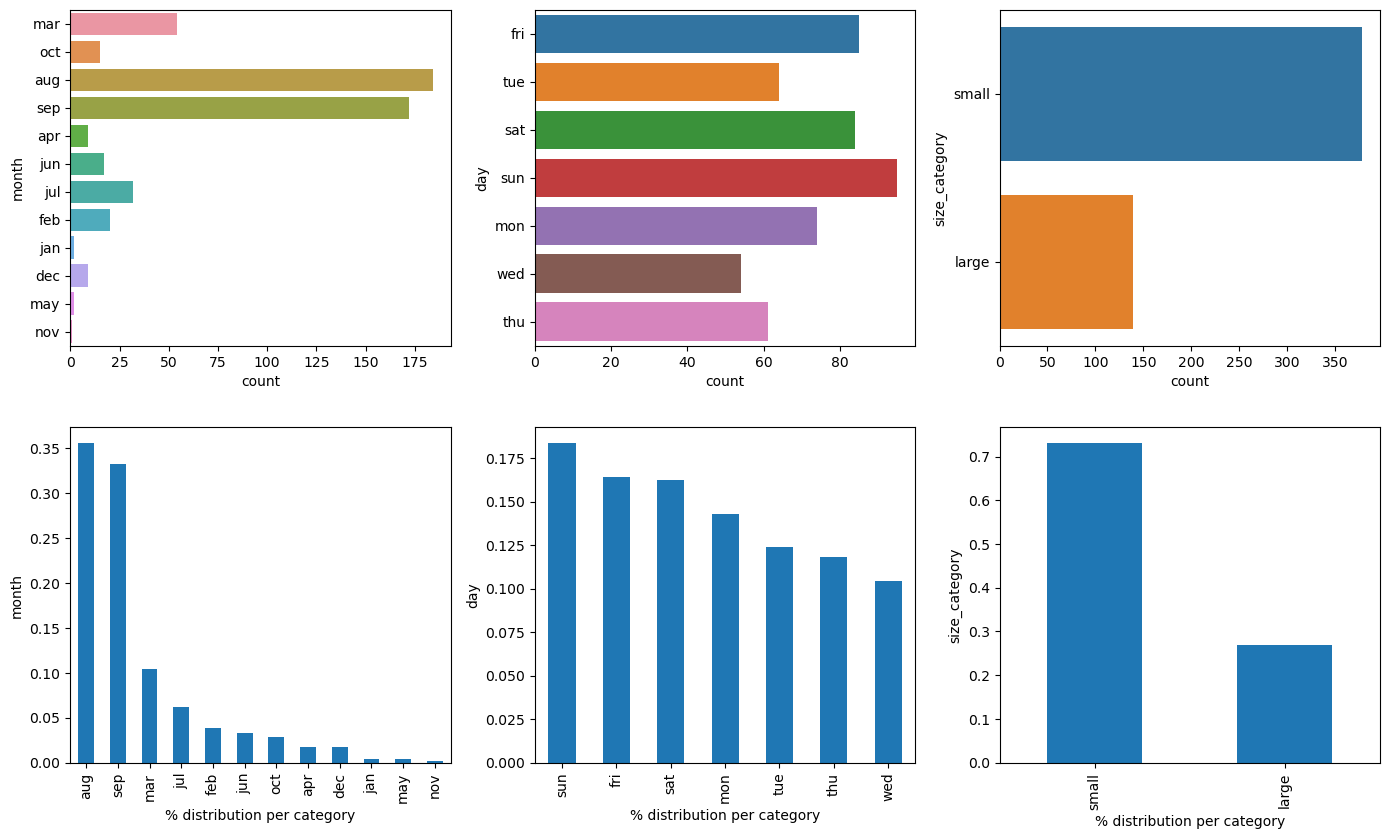

In [28]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data = fire_data,y=col)
    plt.subplot(3,3,i+3)
    fire_data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

*It is interesting to see that abnormally high number of the forest fires 
occur in the month of August and September.

*In the case of day, the days from Friday to Monday have higher
equal proportion of cases. (However, no strong indicators)

## 4.5 Bivariate Analysis

### Analyzing the relationship of categorical features with respect to the Target feature

In [29]:
print(fire_data['area'].describe(),'\n')
# A categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high

df = fire_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


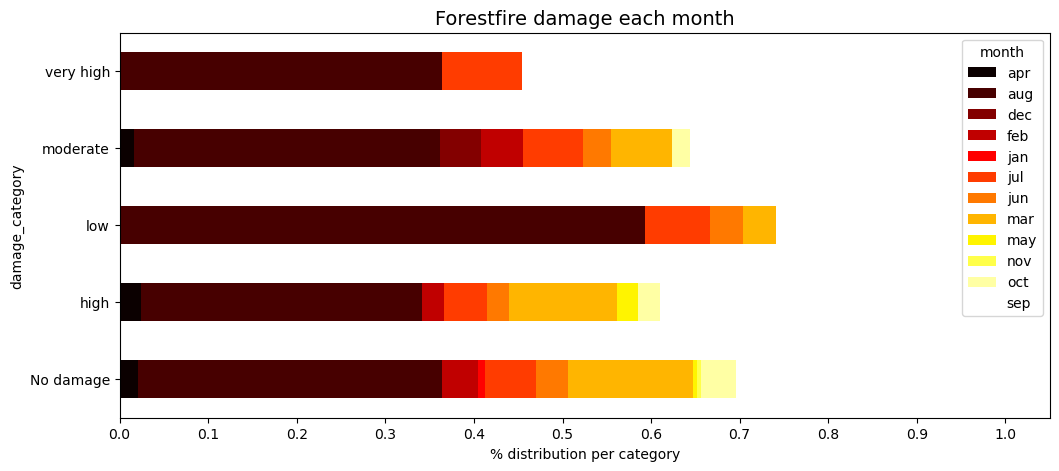

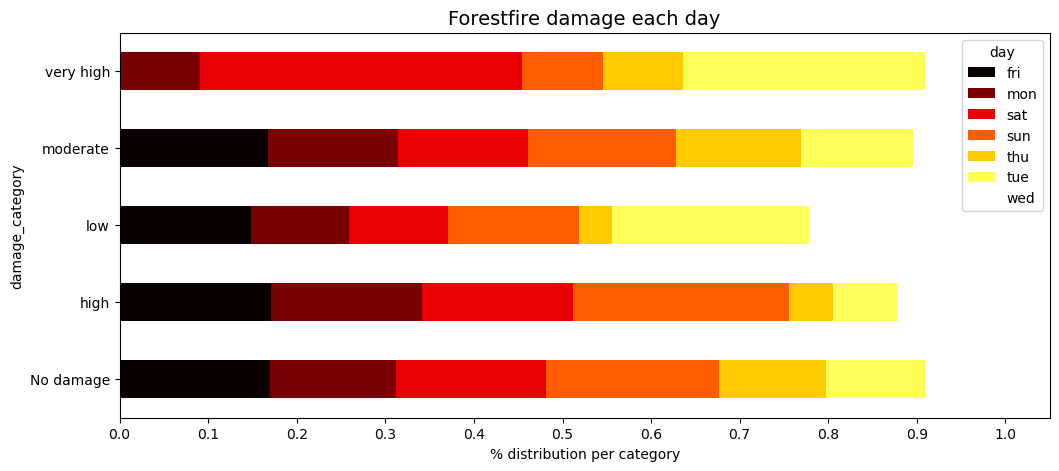

In [30]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,cmap='hot',figsize=(12,5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col), fontsize=14)
        
plt.show()

Previously we had observed that August and September had the most number of forest fires. 
And from the above plot of month, we can understand few things

Most of the fires in August were low (< 1 hectare).

The very high damages(>100 hectares) happened in only 3 months - august,jan and september.

Regarding fire damage per day, nothing much can be observed. 
Except that, there were no very high damaging fires 
on Friday and on Saturdays it has been reported most.

### Monthly analysis of burnt area, where the condition is: area>0

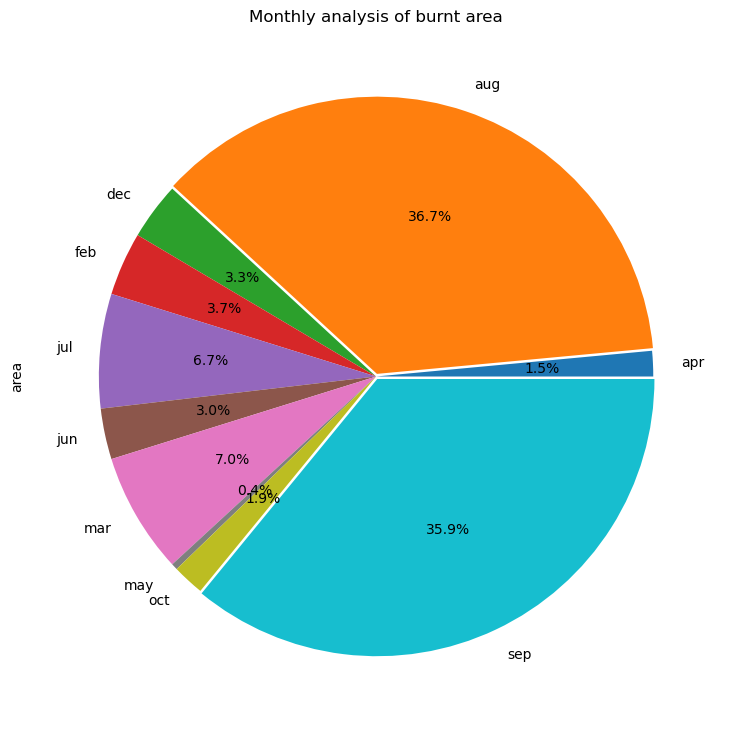

In [31]:
areaburnt = fire_data[fire_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.01,0,0,0,0,0,0,0,0.01],autopct='%0.1f%%')
plt.show()

Observations:
As we can see from the above pie chart,the month of aug and sep have recorded
highest % of forest fire i.e 36.8% & 36.1% respectively.

Month that recorded least forest fire is may with 0.4%

### Checking for Imbalanced or balanced dataset with regards to the Target

In [32]:
countsizesmall = len(fire_data[fire_data.size_category == 'small'])
countsizelarge = len(fire_data[fire_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(fire_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(fire_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


In [33]:
fire_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

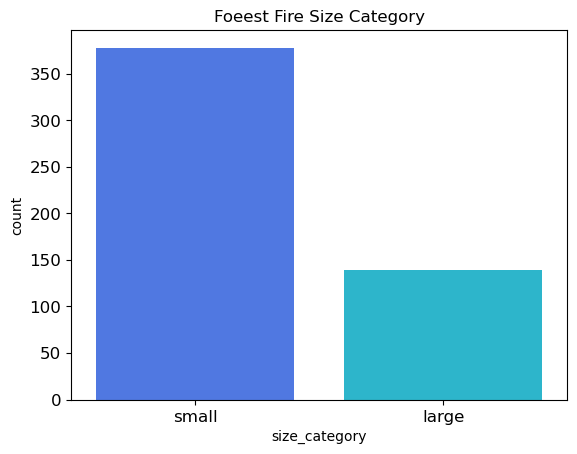

In [34]:
pal = sns.color_palette('rainbow')
sns.countplot(x='size_category', data= fire_data, palette = pal, order= fire_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Foeest Fire Size Category');

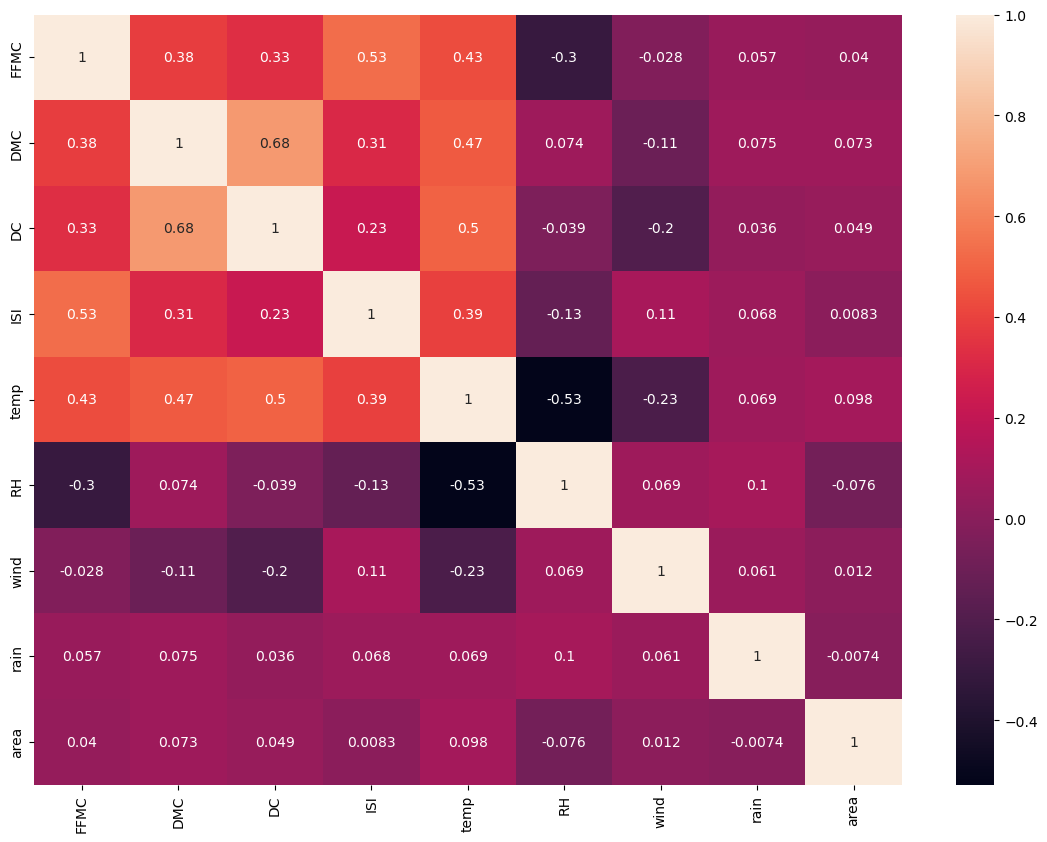

In [35]:
fig= plt.figure(figsize=(14,10))
sns.heatmap(fire_data.corr(), annot=True);
plt.xticks(rotation=90);

## 5. Data Pre-Processing

###  5.1. Feature Engineering

In [36]:
#Applying Standard Scaler
continuous_feature=[feature for feature in fire_data.columns if fire_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 9


In [37]:
fire_data[continuous_feature]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [38]:
df_standard_scaled = fire_data.copy()
features = df_standard_scaled[continuous_feature]
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,small


In [39]:
df = df_standard_scaled.copy()
df.drop('size_category',axis=1, inplace =True)
df = pd.get_dummies(df.iloc[:,:])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [40]:
# Converting string value into binary classes such as if "large" than classify it as '1' else 'O'
df['size_category'] = fire_data.size_category
df['size_category'] = np.where(df['size_category'].str.contains("large"), 1, 0)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [41]:
df.size_category.unique()

array([0, 1])

## 6. Feature Selection Technique

In [42]:
forest_fire.drop(['month','day','area'] ,axis=1, inplace= True)

In [43]:
data1 = forest_fire.copy()
data1.drop('size_category',axis=1, inplace =True)
data1 = pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
data1['size_category'] = df.size_category
data1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Split into input (X) and output (y) variables

In [45]:
X = data1.drop('size_category', axis = 1)
y=  data1.size_category

### Feature Extraction

In [46]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [47]:
#Summarize Scores
scores = fit.scores_
features = fit.transform(X)
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


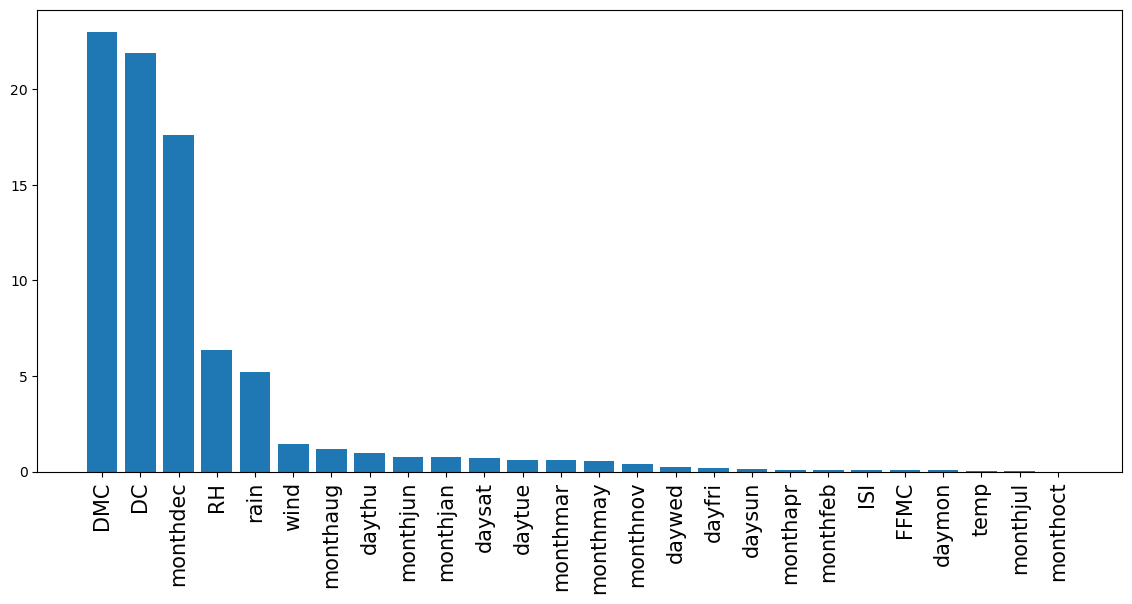

In [48]:
fig, axes = plt.subplots(figsize=(14, 6))

# Sort the indices based on scores in descending order
sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k], reverse=True)

plt.bar([i for i in range(len(scores))], [scores[i] for i in sorted_indices])
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values[sorted_indices])
plt.xticks(rotation=90, size=15)
plt.show()


In [49]:
model_data=df[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


## 6.1 Test Train Split With Imbalanced Dataset

In [54]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)
len(x_train.columns)

18

In [71]:
x_train.shape

(361, 18)

In [72]:
y_train.shape

(361, 1)

## Modeling

In [56]:
from keras.models import Sequential
from keras.layers import Dense
import keras

In [81]:
# create model
model1 = Sequential()

model1.add(Dense(14, input_dim=18, kernel_initializer='uniform', activation='relu'))
model1.add(Dense(12,kernel_initializer='uniform', activation='relu'))
model1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
hist1 = model1.fit(x_train, y_train, validation_split=0.33, epochs=37, batch_size=10)

Epoch 1/37
25/25 [==============================] - 2s 21ms/step - loss: 0.6894 - accuracy: 0.7344 - val_loss: 0.6876 - val_accuracy: 0.6833
Epoch 2/37
25/25 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.7552 - val_loss: 0.6807 - val_accuracy: 0.6833
Epoch 3/37
25/25 [==============================] - 0s 6ms/step - loss: 0.6660 - accuracy: 0.7552 - val_loss: 0.6650 - val_accuracy: 0.6833
Epoch 4/37
25/25 [==============================] - 0s 7ms/step - loss: 0.6357 - accuracy: 0.7552 - val_loss: 0.6364 - val_accuracy: 0.6833
Epoch 5/37
25/25 [==============================] - 0s 7ms/step - loss: 0.5877 - accuracy: 0.7552 - val_loss: 0.6059 - val_accuracy: 0.6833
Epoch 6/37
25/25 [==============================] - 0s 7ms/step - loss: 0.5425 - accuracy: 0.7552 - val_loss: 0.5871 - val_accuracy: 0.6833
Epoch 7/37
25/25 [==============================] - 0s 7ms/step - loss: 0.5158 - accuracy: 0.7593 - val_loss: 0.5777 - val_accuracy: 0.6833
Epoch 8/37
25/25 [=

## Model Evaluation

In [82]:
test_loss, test_acc = model1.evaluate(x_test, y_test)

5/5 [==============================] - 0s 9ms/step - loss: 0.2557 - accuracy: 0.8846


In [83]:
print(hist1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [84]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
32,0.172433,0.929461,0.230042,0.900000,32
33,0.164675,0.929461,0.221257,0.925000,33
34,0.154800,0.933610,0.210107,0.925000,34
35,0.152481,0.946058,0.204090,0.941667,35
36,0.144479,0.941909,0.198674,0.941667,36


## Visualize Training History

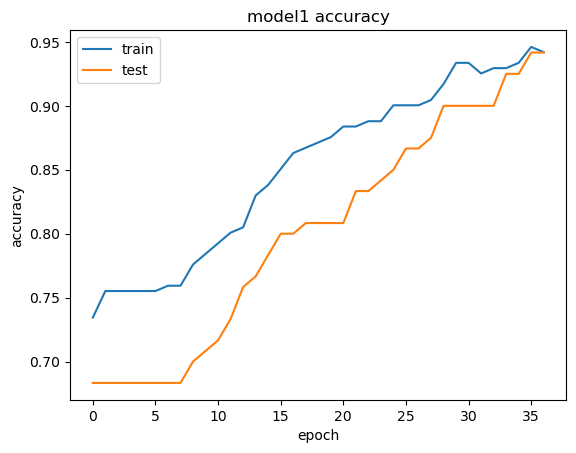

In [85]:
# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

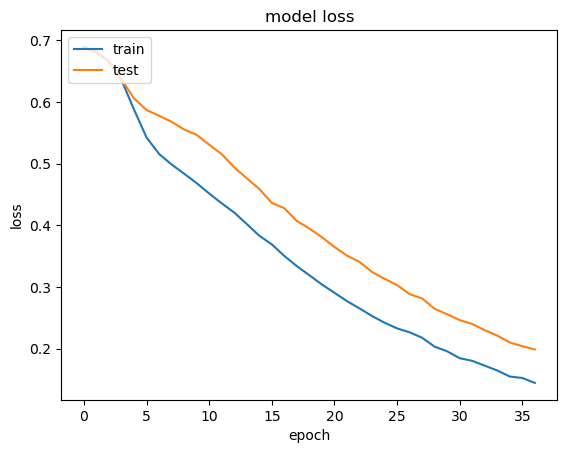

In [87]:
# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction and Model Validation

In [103]:
# Making predictions on the test set
predictions = model1.predict(x_test)

# If you want binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# If you want probabilities
probabilities = predictions

probabilities

5/5 [==============================] - 0s 4ms/step


array([[0.04506971],
       [0.47879672],
       [0.05772718],
       [0.03304749],
       [0.04422342],
       [0.06629378],
       [0.17896762],
       [0.62114644],
       [1.        ],
       [0.03956538],
       [0.04043949],
       [0.03994892],
       [0.3540551 ],
       [0.12449273],
       [0.01496982],
       [0.02186046],
       [0.06377462],
       [0.8641266 ],
       [0.05188277],
       [0.999954  ],
       [0.9765741 ],
       [0.06778563],
       [0.9972299 ],
       [0.9999486 ],
       [0.23108245],
       [0.08939587],
       [0.0563139 ],
       [0.08491515],
       [0.06549705],
       [0.20648035],
       [0.02188313],
       [0.04493257],
       [0.05662059],
       [0.97070754],
       [0.02585492],
       [0.04962899],
       [0.04743851],
       [0.99999917],
       [0.13424706],
       [0.0821635 ],
       [0.04874524],
       [0.07305168],
       [0.00568225],
       [0.04940995],
       [0.17385246],
       [0.19074821],
       [0.0394702 ],
       [0.052

5/5 [==============================] - 0s 3ms/step


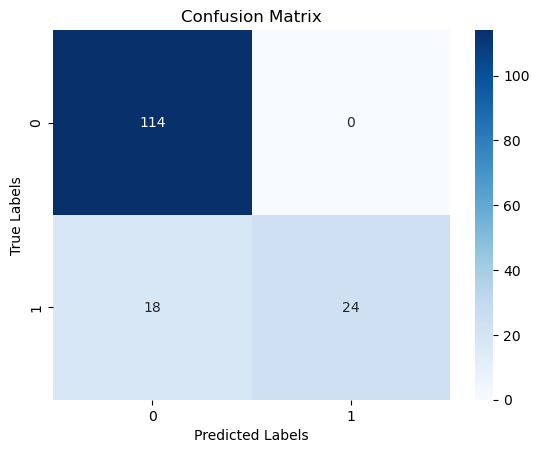

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       114
           1       1.00      0.57      0.73        42

    accuracy                           0.88       156
   macro avg       0.93      0.79      0.83       156
weighted avg       0.90      0.88      0.87       156



In [100]:
from sklearn.metrics import confusion_matrix, classification_report


# Model evaluation on the test set
y_pred = model1.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


## Hyperparameter Tuning 

In [104]:
!pip install keras-tuner


In [105]:
import kerastuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model-building function
def build_model(hp):
    model = Sequential()

    # Choose the number of hidden layers (range: 1 to 5)
    for i in range(hp.Int('num_hidden_layers', 1, 5)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=8, max_value=64, step=8),
                        activation='relu'))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize tuner
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,  # Set the maximum number of epochs for each trial
                     factor=3,  # Factor to reduce the number of trials
                     directory='hyperparam_tuning',  # Directory to store the results
                     project_name='ann_tuning')  # Project name for identification

# Search for the best hyperparameters
tuner.search(x_train, y_train, validation_split=0.33, epochs=37, batch_size=10)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Fit the model with the best hyperparameters
best_model.fit(x_train, y_train, validation_split=0.33, epochs=37, batch_size=10)


Trial 30 Complete [00h 00m 05s]
val_accuracy: 0.8833333253860474

Best val_accuracy So Far: 0.8833333253860474
Total elapsed time: 00h 01m 49s
Epoch 1/37
25/25 [==============================] - 3s 22ms/step - loss: 0.6519 - accuracy: 0.7427 - val_loss: 0.6413 - val_accuracy: 0.6833
Epoch 2/37
25/25 [==============================] - 0s 9ms/step - loss: 0.5873 - accuracy: 0.7552 - val_loss: 0.6150 - val_accuracy: 0.6917
Epoch 3/37
25/25 [==============================] - 0s 8ms/step - loss: 0.5437 - accuracy: 0.7635 - val_loss: 0.5915 - val_accuracy: 0.6917
Epoch 4/37
25/25 [==============================] - 0s 7ms/step - loss: 0.5082 - accuracy: 0.7718 - val_loss: 0.5691 - val_accuracy: 0.7000
Epoch 5/37
25/25 [==============================] - 0s 7ms/step - loss: 0.4749 - accuracy: 0.7884 - val_loss: 0.5505 - val_accuracy: 0.7000
Epoch 6/37
25/25 [==============================] - 0s 7ms/step - loss: 0.4497 - accuracy: 0.7925 - val_loss: 0.5277 - val_accuracy: 0.7167
Epoch 7/37
25/25

5/5 [==============================] - 0s 5ms/step


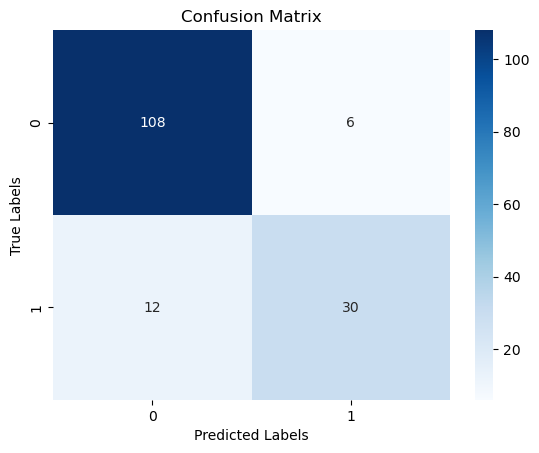

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       114
           1       0.83      0.71      0.77        42

    accuracy                           0.88       156
   macro avg       0.87      0.83      0.85       156
weighted avg       0.88      0.88      0.88       156



In [107]:
# Model evaluation on the test set
y_pred = best_model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary classes

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Thank you